In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# NO CODE

def simulate_T1_T2(N, n):
    tanks = np.arange(1, N+1)
    sample = np.random.choice(tanks, size=n, replace=False)
    t1 = 2*np.mean(sample) - 1
    t2 = max(sample)*(n+1)/n - 1
    return [t1, t2]

def compare_T1_T2(N, n, repetitions):
    tbl = Table(['T_1 = 2*Mean-1', 'T_2 = Augmented Max'])
    for i in np.arange(repetitions):
        tbl.append(simulate_T1_T2(N, n))
    
    tbl.hist(bins=np.arange(N/2, 3*N/2))
    plt.title('$N =$'+str(N)+', $n =$'+str(n)+' ('+str(repetitions)+' repetitions)');


## Additivity ##

Calculating expectation by plugging into the definition works in simple cases, but often it can be cumbersome or lack insight. The most powerful result for calculating expectation turns out not to be the definition. It looks rather innocuous:

### Additivity of Expectation ###
Let $X$ and $Y$ be two random variables defined on the same probability space. Then

$$
E(X+Y) = E(X) + E(Y)
$$

Before we look more closely at this result, note that we are assuming that all the expectations exist; we will do this throughout in this course. 

And now note that **there are no assumptions about the relation between $X$ and $Y$**. They could be dependent or independent. Regardless, the expectation of the sum is the sum of the expectations. This makes the result powerful.

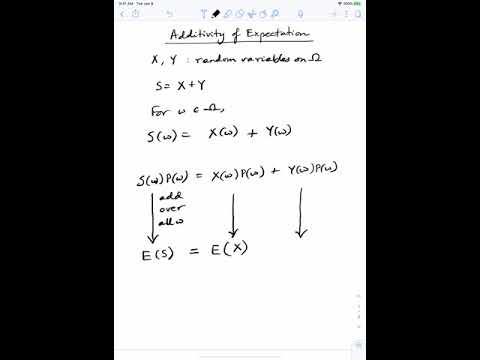

In [3]:
# VIDEO: Additivity of Expectation
from IPython.display import YouTubeVideo

YouTubeVideo('HzZEhM4NHUQ')

Additivity follows easily from the definition of $X+Y$ and the definition of expectation on the domain space. First note that the random variable $X+Y$ is the function defined by

$$
(X+Y)(\omega) = X(\omega) + Y(\omega) ~~~~ \text{for all }
\omega \in \Omega
$$

Thus a "value of $X+Y$ weighted by the probability" can be written as

$$
(X+Y)(\omega) \cdot P(\omega) = X(\omega)P(\omega) + 
Y(\omega)P(\omega )
$$

Sum the two sides over all $\omega \in \Omega$ to prove additivty of expecation.

```{admonition} Quick Check
Let $X$ and $Y$ be random variables on the same space, with $E(X) = 5$ and $E(Y) = 3$.

(a) Find $E(X-Y)$.

(b) Find $E(2X-8Y+7)$.

```

```{admonition} Answer
:class: dropdown
(a) $2$ because $X-Y = X+(-Y)$

(b) $-7$

```

By induction, additivity extends to any finite number of random variables. If $X_1, X_2, \ldots , X_n$ are random variables defined on the same probability space, then

$$
E(X_1 + X_2 + \cdots + X_n) = E(X_1) + E(X_2) + \cdots + E(X_n)
$$

regardless of the dependence structure of $X_1, X_2, \ldots, X_n$.

If you are trying to find an expectation, then the way to use additivity is to write your random variable as a sum of simpler variables whose expectations you know or can calculate easily. 

### $E(X^2)$ for a Poisson Variable $X$ ###

Let $X$ have the Poisson $\mu$ distribution. In earlier sections we showed that $E(X) = \mu$ and $E(X(X-1)) = \mu^2$.

Now $X^2 = X(X-1) + X$. The random variables $X(X-1)$ and $X$ are both functions of $X$, so they are not independent of each other. But additivity of expectation doesn't require independence, so we can use it to see that

$$
E(X^2) ~ = ~ E(X(X-1)) + E(X) ~ = ~ \mu^2 + \mu
$$

We will use this fact later when we study the variability of $X$. 

It is worth noting that it is not easy to calculate $E(X^2)$ directly, since

$$
E(X^2) ~ = ~ \sum_{k=0}^\infty k^2 e^{-\mu}\frac{\mu^k}{k!}
$$

is not an easy sum to simplify.

### Sample Sum ###
Let $X_1, X_2, \ldots , X_n$ be a sample drawn at random from a numerical population that has mean $\mu$, and let the sample sum be 

$$
S_n = X_1 + X_2 + \cdots + X_n
$$

Then, regardless of whether the sample was drawn with or without replacement, each $X_i$ has the same distribution as the population. This is clearly true if the sampling is with replacement, and it is true by symmetry if the sampling is without replacement as we saw in an earlier chapter.

So, regardless of whether the sample is drawn with or without replacement, $E(X_i) = \mu$ for each $i$, and hence

$$
E(S_n) = E(X_1) + E(X_2) + \cdots + E(X_n) = n\mu
$$

We can use this to estimate a population mean based on a sample mean.

### Unbiased Estimator ###

Suppose a random variable $X$ is being used to estimate a fixed numerical parameter $\theta$. Then $X$ is called an *estimator* of $\theta$. 

The *bias* of $X$ is the difference $E(X) - \theta$. The bias measures the amount by which the estimator exceeds the parameter, on average. The bias can be negative if the estimator tends to underestimate the parameter.

If the bias of an estimator is $0$ then the estimator is called *unbiased*. So $X$ is an unbiased estimator of $\theta$ if $E(X) = \theta$.

If an estimator is unbiased, and you use it to generate estimates repeatedly and independently, then in the long run the average of all the estimates is equal to the parameter being estimated. On average, the unbiased estimator is neither higher nor lower than the parameter. That's usually considered a good quality in an estimator.

In practical terms, if a data scientist wants to estimate an unknown parameter based on a random sample $X_1, X_2, \ldots, X_n$, the data scientist has to come up with a *statistic* to use as the estimator. 

Recall from Data 8 that a statistic is a number computed from the sample. In other words, a statistic is a numerical function of $X_1, X_2, \ldots, X_n$.

Constructing an unbiased estimator of a parameter $\theta$ therefore amounts to finding a statistic $T = g(X_1, X_2, \ldots, X_n)$ for a function $g$ such that $E(T) = \theta$.

### Unbiased Estimators of a Population Mean ###

As in the sample sum example above, let $S_n$ be the sum of a sample $X_1, X_2, \ldots , X_n$ drawn at random from a population that has mean $\mu$. The standard statistical notation for the average of $X_1, X_2, \ldots , X_n$ is $\bar{X}_n$. So

$$
\bar{X}_n = \frac{S_n}{n}
$$

Then, regardless of whether the draws were made with replacement or without,

$$
\begin{align*}
E(\bar{X}_n) &= \frac{E(S_n)}{n} ~~~~ \text{(linear function rule)} \\
&= \frac{n \mu}{n} ~~~~~~~~~ \text{(} E(S_n) = n\mu \text{)} \\
&= \mu
\end{align*}
$$

Thus the sample mean is an unbiased estimator of the population mean.

It is worth noting that $X_1$ is also an unbiased estimator of $\mu$, since $E(X_1) = \mu$. So is $X_j$ for any $j$, also $(X_1 + X_9)/2$, or any linear combination of the sample if the coefficients add up to 1.

But it seems clear that using the sample mean as the estimator is better than using just one sampled element, even though both are unbiased. This is true, and is related to how variable the estimators are. We will address this later in the course.

```{admonition} Quick Check
Let $X_1, X_2, X_3$ be i.i.d. Poisson $(\mu)$ random variables, and suppose the value of $\mu$ is unknown. Is $0.4X_1 + 0.2X_2 + 0.4X_3$ an unbiased estimator of $\mu$?

```

```{admonition} Answer
:class: dropdown
Yes

```

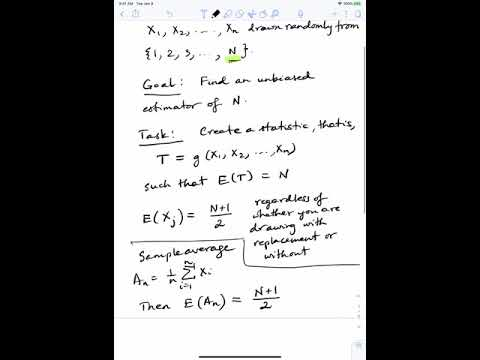

In [4]:
# VIDEO: Example of an Unbiased Estimator

YouTubeVideo('ruEpGZJwHmw')

### First Unbiased Estimator of a Maximum Possible Value ###

Suppose we have a sample $X_1, X_2, \ldots , X_n$ drawn at random from $1, 2, \ldots , N$ for some fixed $N$, and we are trying to estimate $N$. 

How can we use the sample to construct an unbiased estimator of $N$? By definition, such an estimator must be a function of the sample and its expectation must be $N$.

In other words, we have to construct a statistic that has expectation $N$.

Each $X_i$ has the uniform distribution on $1, 2, \ldots , N$. This is true for sampling with replacement as well as for simple random sampling, by symmetry. 

The expectation of each of the uniform variables is $(N+1)/2$, as we have seen earlier. So if $\bar{X}_n$ is the sample mean, then

$$
E(\bar{X}_n) = \frac{N+1}{2}
$$

Clearly, $\bar{X}_n$ is not an unbiased estimator of $N$. That's not surprising because $N$ is the maximum possible value of each observation and $\bar{X}_n$ should be somewhere in the middle of all the possible values.

But because $E(\bar{X}_n)$ is a linear function of $N$, we can figure out how to create an unbiased estimator of $N$. 

Remember that our job is to create a function of the sample $X_1, X_2, \ldots, X_n$ in such a way that the expectation of that function is $N$.

Start by inverting the linear function, that is, by isolating $N$ in the equation above.

$$
2E(\bar{X}_n) - 1 =  N
$$

This tells us what we have to do to the sample $X_1, X_2, \ldots, X_n$ to get an unbiased estimator of $N$.

We should just use the statistic $T_1 = 2\bar{X}_n - 1$ as the estimator. It is unbiased because $E(T_1) = N$ by the calculation above.

```{admonition} Quick Check
In the setting above, what is the bias of $2\bar{X}_n$ as an estimator of $N$? Does it tend to overestimate on average, or underestimate?

```

```{admonition} Answer
:class: dropdown
$1$; overestimate

```

### Second Unbiased Estimator of the Maximum Possible Value ###

The calculation above stems from a problem the Allied forces faced in World War II. Germany had a seemingly never-ending fleet of Panzer tanks, and the Allies needed to estimate how many they had. They decided to base their estimates on the serial numbers of the tanks that they saw.

Here is a picture of one from [Wikipedia](https://en.wikipedia.org/wiki/Panzer_IV).

![Panzer Tank](panzer.png)

Notice the serial number on the top left. When tanks were disabled or destroyed, it was discovered that their parts had serial numbers too. The ones from the gear boxes proved very useful.

The idea was to model the observed serial numbers as random draws from $1, 2, \ldots, N$ and then estimate $N$. This is of course a very simplified model of reality. But estimates based on even such simple probabilistic models proved to be quite a bit [more accurate](https://en.wikipedia.org/wiki/German_tank_problem#Specific_data) than those based on the intelligence gathered by the Allies. For example, in August 1942, intelligence estimates were that Germany was producing 1,550 tanks per month. The prediction based on the probability model was 327 per month. After the war, German records showed that the actual production rate was 342 per month.

The model was that the draws were made at random without replacement from the integers 1 through $N$. 

In the example above, we constructed the random variable $T$ to be an unbiased estimator of $N$ under this model.

The Allied statisticians instead started with $M$, the sample maximum:

$$
M ~ = ~ \max\{X_1, X_2, \ldots, X_n\}
$$

The sample maximum $M$ is a biased estimator of $N$, because we know that its value is always less than or equal to $N$. Its average value therefore will be somewhat less than $N$.

To correct for this, the Allied statisticians imagined a row of $N$ spots for the serial numbers $1$ through $N$, with marks at the spots corresponding to the observed serial numbers. The visualization below shows an outcome in the case $N= 20$ and $n = 3$.

![gaps](all_gaps.png)

- There are $N = 20$ spots in all. 
- From these, we take a simple random sample of size $n = 3$. Those are the gold spots.
- The remaining $N - n = 17$ spots are colored blue.

The $n = 3$ sampled spots create $n+1 = 4$ blue "gaps" between sampled values: one before the leftmost gold spot, two between successive gold spots, and one after the rightmost gold spot that is at position $M$.

A key observation is that because of the symmetry of simple random sampling, **the lengths of all four gaps have the same distribution.** 

But of course we don't get to see all the gaps. In the sample, we can see all but the last gap, as in the figure below. The red question mark reminds you that the gap to the right of $M$ is invisible to us.

![mystery gap](mystery_gap.png)

If we could see the gap to the right of $M$, we would see $N$. But we can't. So we can try to do the next best thing, which is to augment $M$ by the estimated size of that gap.

Since we can see all of the spots and their colors up to and including $M$, we can see $n$ out of the $n+1$ gaps. The lengths of the gaps all have the same distribution by symmetry, so we can estimate the length of a single gap by the average length of all the gaps that we can see.

We can see $M$ spots, of which $n$ are the sampled values. So the total length of all $n$ visible gaps is $M-n$. Therefore

$$
\text{estimated length of one gap} ~ = ~ \frac{M-n}{n}
$$

So the Allied statisticians decided to improve upon $M$ by using the *augmented maximum* as their estimator:

$$
T_2 ~ = ~  M + \frac{M-n}{n}
$$

By algebra, this estimator can be rewritten as

$$
T_2 ~ = ~ M\cdot\frac{n+1}{n} ~ - ~ 1
$$

Is $T_2$ an unbiased estimator of $N$? To answer this, we have to find its expectation. Since $T_2$ is a linear function of $M$, we'll find the expectation of $M$ first.

Here once again is the visualization of what's going on.

![gaps](all_gaps.png)

Let $G$ be the length of the last gap. Then $M = N - G$.

There are $n+1$ gaps, made up of the $N-n$ unsampled values. Since they all have the same expected length,

$$
E(G) ~ = ~ \frac{N-n}{n+1}
$$

So

$$
E(M) ~ = ~ N - \frac{N-n}{n+1} ~ = ~ (N+1)\frac{n}{n+1}
$$

Recall that the Allied statisticians' estimate of $N$ is

$$
T_2 ~ = ~ M\cdot\frac{n+1}{n}  -  1
$$

Now

$$
E(T_2) ~ = ~ E(M)\cdot\frac{n+1}{n}  -  1 ~ = ~ (N+1)\frac{n}{n+1}\cdot\frac{n+1}{n} - 1 ~ = ~ N
$$

Thus the augmented maximum $T_2$ is an unbiased estimator of $N$.

```{admonition} Quick Check
A gardener in Berkeley has 23 blue flower pots in a row. She picks a simple random sample of 5 of them and colors the selected pots gold. What is the expected number of blue flower pots at the end of the row?

```

```{admonition} Answer
:class: dropdown
$3$

```

### Which Estimator to Use? ###
The Allied statisticians thus had two unbiased estimators of $N$ from which to choose. They went with $T_2$ instead of $T_1$ because $T_2$ has less variability.

We will quantify this later in the course. For now, here is a simulation of distributions of the two estimators in the case $N = 300$ and $n=30$. The simulation is based on $5000$ repetitions of drawing a simple random sample of size $30$ from the integers $1$ through $300$.

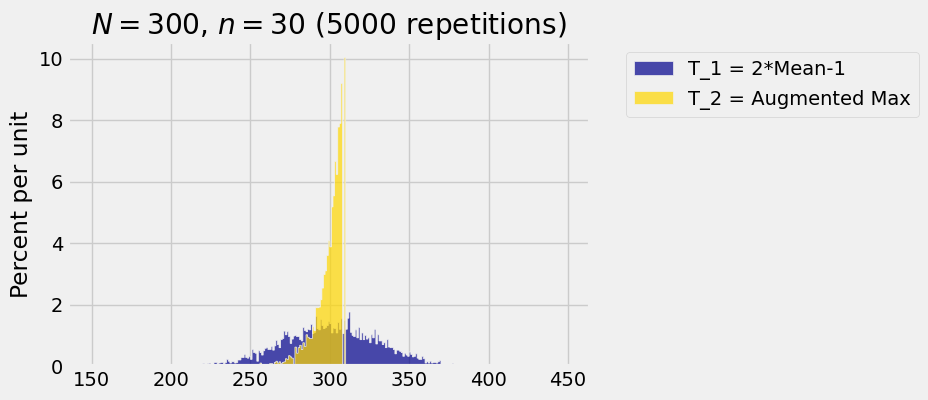

In [5]:
compare_T1_T2(300, 30, 5000)

You can see why $T_2$ is a better estimator than $T_1$. 

- Both are unbiased. So both the empirical histograms are balanced at around $300$, the true value of $N$.
- The emipirical distribution of $T_2$ is clustered much closer to the true value $300$ than the empirical distribution of $T_1$.

For a recap, take another look at the [accuracy table](https://en.wikipedia.org/wiki/German_tank_problem#Specific_data) of the Allied statisticians' estimator $T_2$. Not bad for an estimator based on a model that assumes nothing more complicated than simple random sampling!